In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: dec_dependent_scale_factor.py
"""
Created on Thu Jun 28 00:05:20 2018

@author: Neo(liuniu@smail.nju.edu.cn)

"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, deg2rad, sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# My modules
from error_inflation_progs import (
    error_inflation, declination_error_calc_DSM, wrms_calc)

In [12]:
# Load data
datfile = ("../logs/pos_diff_cln.dat")
soulist = np.genfromtxt(datfile, usecols=(0,), dtype=str)
RA, Dec, dRAc, dDec, dRAc_err, dDec_err = np.genfromtxt(
    datfile, usecols=range(1, 7), unpack=True)
num_ses_mean, num_obs_mean = np.genfromtxt(
    datfile, dtype=int, usecols=range(10, 12), unpack=True)

# Load results of scale factor and noise floor
lab = np.genfromtxt("../logs/nf_sf.dat", usecols=(0,), dtype=str)
sf_RA, nf_RA, sf_Dec, nf_Dec = np.genfromtxt(
    "../logs/nf_sf.dat", usecols=(1, 3, 5, 7), unpack=True)

# Calculate the declination-dependent noise and scale factor
dec_means, _, sf_RAs, nf_RAs, sf_Decs, nf_Decs = declination_error_calc_DSM(Dec, dRAc, dDec, dRAc_err, dDec_err)

#  bin   Num_sou    sf_ra    nf_ra   sf_dec   sf_dec
[-90,-75)    11    1.547    0.032    0.876    0.022
[-75,-60)    42    1.411    0.054    0.976    0.045
[-60,-45)    37    1.513    0.054    1.124    0.050
[-45,-30)    64    1.465    0.028    1.403    0.035
[-30,-15)    76    1.254    0.022    1.409    0.030
[-15, +0)    63    1.483    0.017    1.487    0.022
[ +0,+15)   125    1.386    0.021    1.255    0.026
[+15,+30)    98    1.467    0.021    1.210    0.022
[+30,+45)    90    1.333    0.017    1.283    0.020
[+45,+60)    54    1.389    0.014    1.517    0.018
[+60,+75)    36    1.264    0.015    1.298    0.015
[+75,+90)    13    1.571    0.015    1.433    0.013


In [13]:
# Inflate the formal error
# ----------------
# Result of DSM
dRAc_err_inf0 = error_inflation(dRAc_err, sf_RA[0], nf_RA[0])
dDec_err_inf0 = error_inflation(dDec_err, sf_Dec[0], nf_Dec[0])

# Calculate the declination-dependent noise and scale factor
dec_means0, _, sf_RAs0, nf_RAs0, sf_Decs0, nf_Decs0 = declination_error_calc_DSM(
    Dec, dRAc, dDec, dRAc_err_inf0, dDec_err_inf0)

#  bin   Num_sou    sf_ra    nf_ra   sf_dec   sf_dec
[-90,-75)    11    1.064    0.043    0.584    0.029
[-75,-60)    42    0.961    0.062    0.718    0.052
[-60,-45)    37    1.028    0.060    0.809    0.056
[-45,-30)    64    0.994    0.040    0.961    0.047
[-30,-15)    76    0.781    0.027    0.976    0.039
[-15, +0)    63    0.905    0.026    0.944    0.031
[ +0,+15)   125    0.870    0.029    0.845    0.034
[+15,+30)    98    0.942    0.030    0.821    0.031
[+30,+45)    90    0.798    0.024    0.806    0.028
[+45,+60)    54    0.766    0.020    0.890    0.027
[+60,+75)    36    0.759    0.022    0.743    0.022
[+75,+90)    13    0.946    0.023    0.758    0.018


In [14]:
# ----------------
# Result of SBL
dRAc_err_inf1 = error_inflation(dRAc_err, sf_RA[1], nf_RA[1])
dDec_err_inf1 = error_inflation(dDec_err, sf_Dec[1], nf_Dec[1])

# Calculate the declination-dependent noise and scale factor
dec_means1, _, sf_RAs1, nf_RAs1, sf_Decs1, nf_Decs1 = declination_error_calc_DSM(
    Dec, dRAc, dDec, dRAc_err_inf1, dDec_err_inf1)

#  bin   Num_sou    sf_ra    nf_ra   sf_dec   sf_dec
[-90,-75)    11    1.192    0.035    0.700    0.025
[-75,-60)    42    1.085    0.057    0.821    0.048
[-60,-45)    37    1.162    0.056    0.937    0.052
[-45,-30)    64    1.122    0.032    1.137    0.040
[-30,-15)    76    0.930    0.023    1.153    0.034
[-15, +0)    63    1.087    0.020    1.157    0.026
[ +0,+15)   125    1.030    0.024    1.012    0.030
[+15,+30)    98    1.105    0.024    0.973    0.026
[+30,+45)    90    0.968    0.020    0.987    0.024
[+45,+60)    54    0.964    0.017    1.118    0.023
[+60,+75)    36    0.918    0.017    0.945    0.019
[+75,+90)    13    1.141    0.018    1.010    0.016


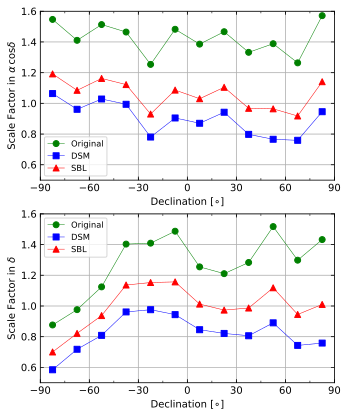

In [16]:
# wrms difference VS median formal uncertainty (Log-plot)
# fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)
fig, (ax0, ax1) = plt.subplots(figsize=(5, 6), nrows=2)

ax0.plot(dec_means, sf_RAs, "go-", lw=0.5, label="Original")
ax0.plot(dec_means0, sf_RAs0, "bs-", lw=0.5, label="DSM")
ax0.plot(dec_means1, sf_RAs1, "r^-", lw=0.5, label="SBL")

ax1.plot(dec_means, sf_Decs, "go-", lw=0.5, label="Original")
ax1.plot(dec_means0, sf_Decs0, "bs-", lw=0.5, label="DSM")
ax1.plot(dec_means1, sf_Decs1, "r^-", lw=0.5, label="SBL")

ax0.set_xlabel("Declination [$\circ$]")
ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_ylabel("Scale Factor in $\\alpha\\,\\cos\\delta$")
ax0.set_ylim([0.5, 1.6])
# ax0.set_yticks(np.arange(0.5, 2.1, 0.5))
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.grid(True)
ax0.legend(fontsize="small")

ax1.set_xlabel("Declination [$\circ$]")
ax1.set_xlim([-90, 90])
ax1.set_xticks(np.arange(-90, 91, 30))
ax1.set_ylabel("Scale Factor in $\\delta$")
ax1.set_ylim([0.5, 1.6])
# ax1.set_yticks(np.arange(0.5, 2.1, 0.5))
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend(fontsize="small")

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# minorLocator = MultipleLocator(0.05)
# ax0.yaxis.set_minor_locator(minorLocator)
# ax1.yaxis.set_minor_locator(minorLocator)

minorLocator = MultipleLocator(15)
ax0.xaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

# ax1.grid(True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.savefig("../plots/dec_sf.eps")